# Esercitazione 1

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

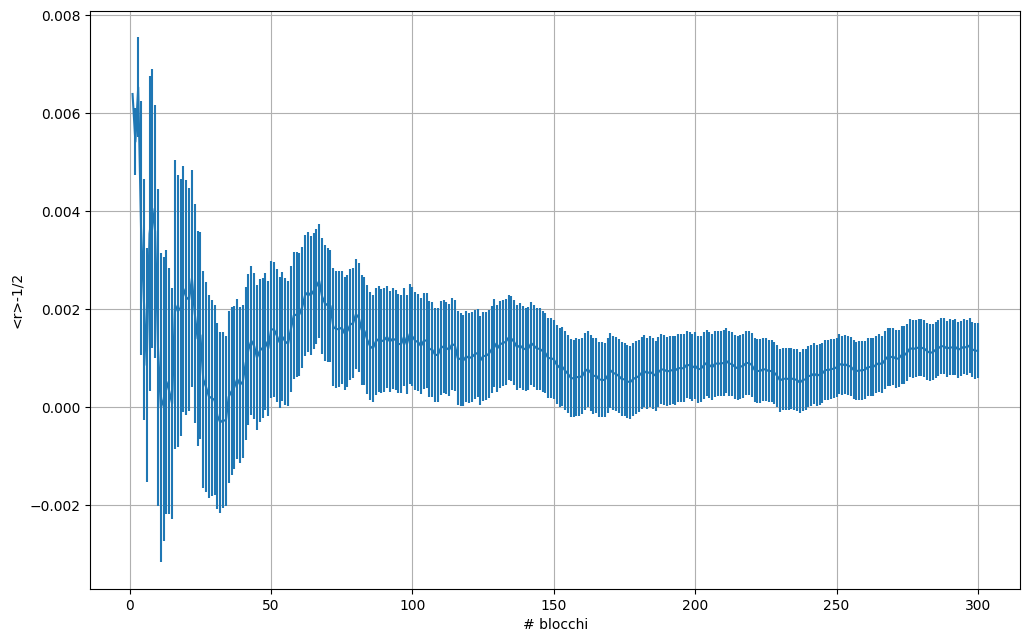

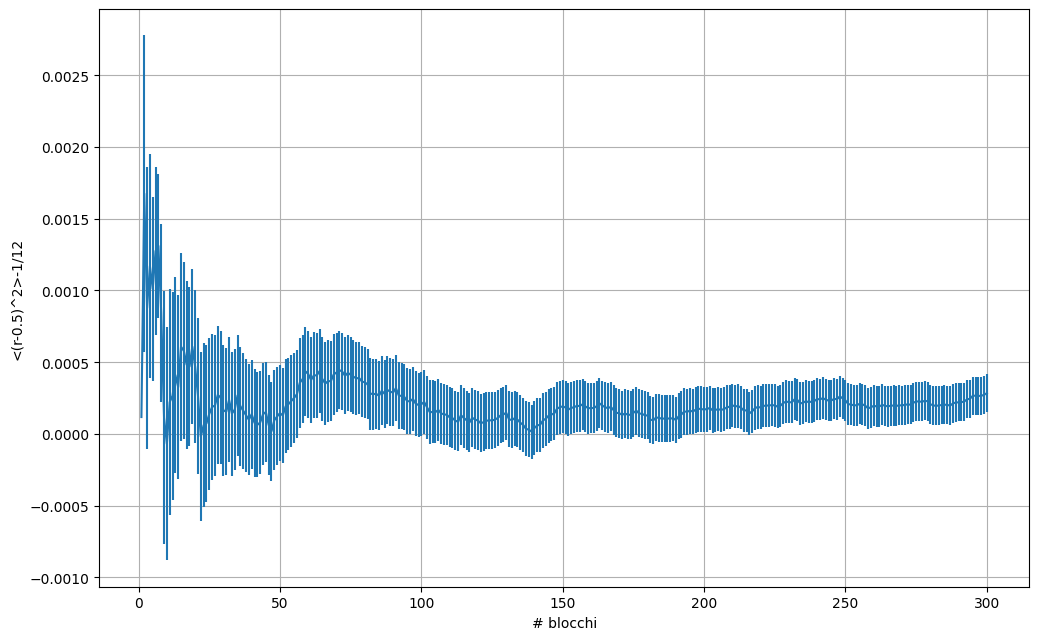

In [4]:
data=np.loadtxt("output_average.dat")

plt.figure(figsize=(12, 7.5))
plt.errorbar(data[:, 0], data[:, 2] - 0.5, yerr=data[:, 3])
plt.xlabel("# blocchi")
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

data2=np.loadtxt("output_error.dat")

plt.figure(figsize=(12, 7.5))
plt.errorbar(data2[:, 0], data2[:, 2] - 1/12, yerr=data2[:, 3])
plt.xlabel("# blocchi")
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>). <br>

True probability distribution: 

$$ f(x;k) = \frac{x^{k/2 - 1}e^{-x/2}}{2^{k/2}\Gamma\left( k/2 \right)}  \,\,\,\,\,\,\,\,\,\,\, x>0$$

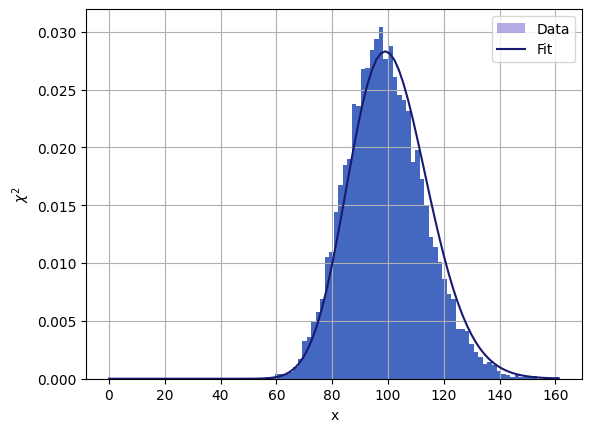

In [5]:
from scipy.optimize import curve_fit
from scipy.special import gamma

chi2 = np.loadtxt("chiout.dat")

# Distribuzione Chi2
def chisquared(x, k):
    return (x**(k/2 - 1) * np.exp(-x/2)) / (2**(k/2) * gamma(k/2))

# Set up the histogram
n, bins, _ = plt.hist(chi2, bins=70, density=True)
# Get the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Fit the function to the histogram data
popt, pcov = curve_fit(chisquared, bin_centers, n)
# Generate x values for the fitted curve
x_fit = np.linspace(0, max(bin_centers), 100)

plt.hist(chi2, bins=70, density=True, alpha=0.5, label='Data', color='slateblue')

# Fitted curve
plt.plot(x_fit, chisquared(x_fit, *popt), label='Fit', color='midnightblue')

plt.xlabel("x")
plt.ylabel('$\chi^2$')
plt.grid(True)

plt.legend()

plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

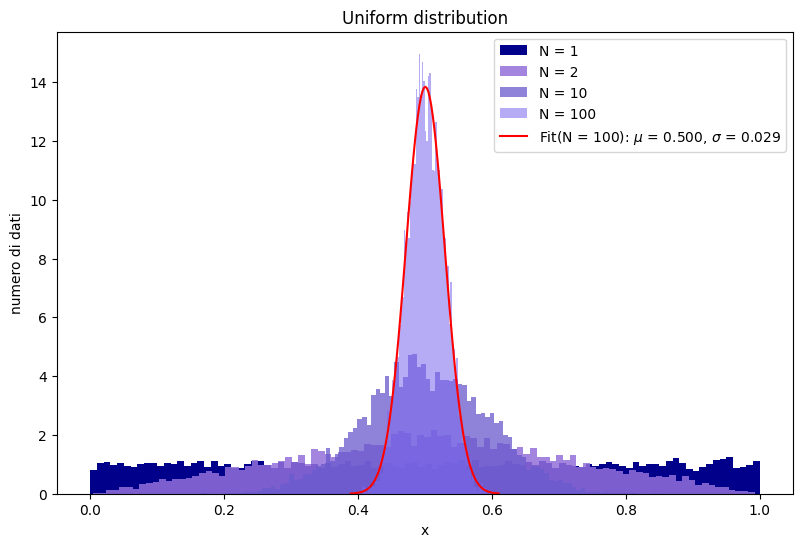

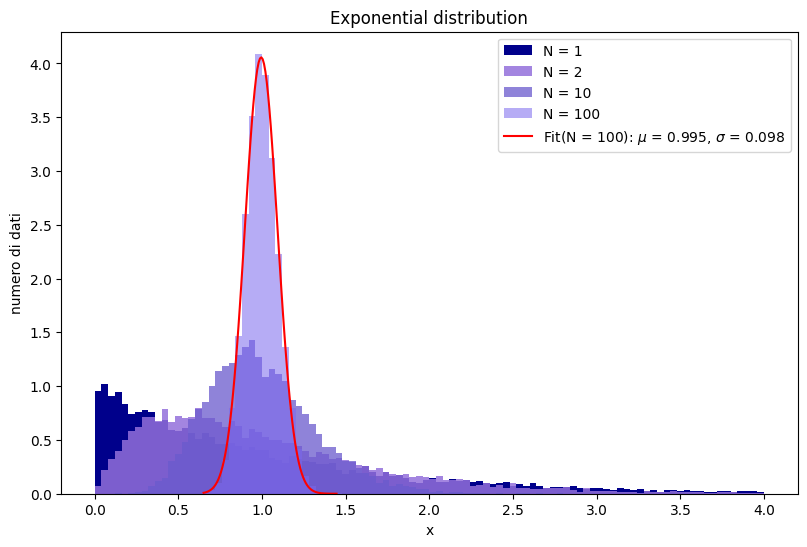

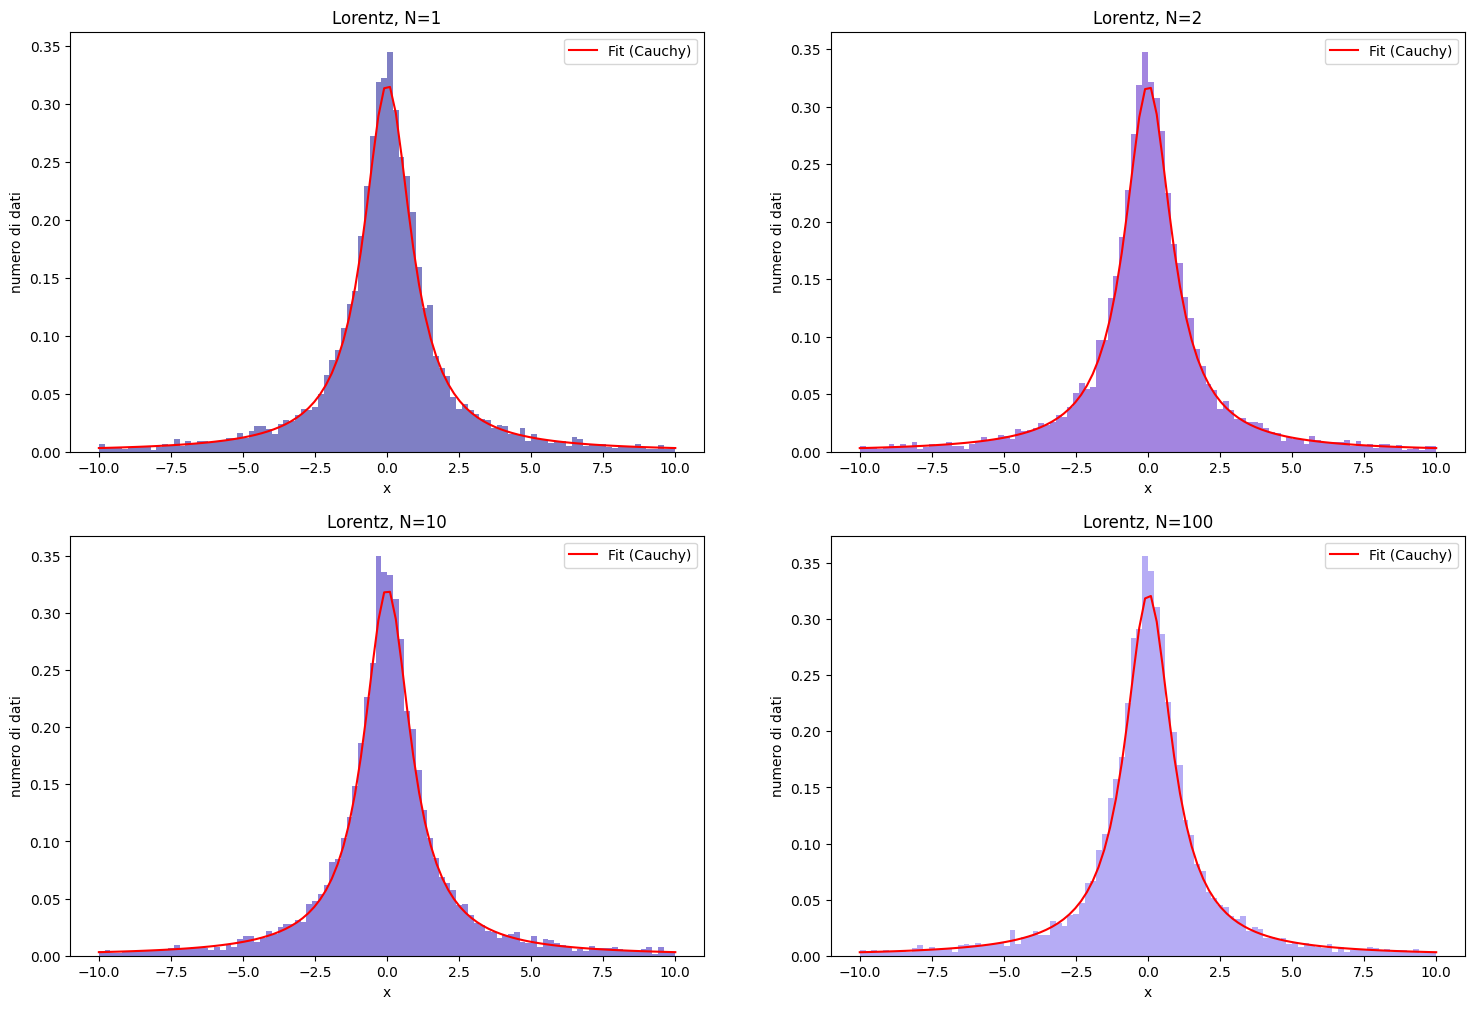

In [6]:
from scipy.stats import cauchy

histo_standard=np.loadtxt("histo_standard.dat")
histo_exp=np.loadtxt("histo_exp.dat")
histo_lorentz=np.loadtxt("histo_lorentz.dat")

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Fit histogram with N = 100 for the Uniform distribution
bin_heights, bin_edges = np.histogram(histo_standard[:,3], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt_uniform, _ = curve_fit(gaussian, bin_centers, bin_heights)

plt.figure(figsize=(9.5, 6))

plt.hist(histo_standard[:,0], 100, density=True, alpha = 1 ,color = 'darkblue',label="N = 1")
plt.hist(histo_standard[:,1], 100, density=True, alpha = 0.85 ,color = 'mediumpurple', label="N = 2")
plt.hist(histo_standard[:,2], 100, density=True, alpha = 0.75 ,color = 'slateblue', label="N = 10")
plt.hist(histo_standard[:,3], 100, density=True, alpha = 0.55 ,color = 'mediumslateblue', label="N = 100")

x_uniform_fit = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_uniform_fit, gaussian(x_uniform_fit, *popt_uniform), 'r-', label='Fit(N = 100): $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(popt_uniform[1], abs(popt_uniform[2])))

plt.title("Uniform distribution")
plt.xlabel("x")
plt.ylabel("numero di dati")
plt.legend()
plt.show()

# Fit histogram with N = 100 for the Exponential distribution
bin_heights, bin_edges = np.histogram(histo_exp[:,3], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt_exponential, _ = curve_fit(gaussian, bin_centers, bin_heights)

plt.figure(figsize=(9.5, 6))

plt.hist(histo_exp[:,0], 100, density=True, alpha = 1, range = [0,4], color = 'darkblue', label="N = 1")
plt.hist(histo_exp[:,1], 100, density=True, alpha = 0.85 , range = [0,4], color = 'mediumpurple', label="N = 2")
plt.hist(histo_exp[:,2], 100, density=True, alpha = 0.75 , range = [0,4], color = 'slateblue', label="N = 10")
plt.hist(histo_exp[:,3], 100, density=True, alpha = 0.55 , range = [0,4], color = 'mediumslateblue', label="N = 100")

x_exponential_fit = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_exponential_fit, gaussian(x_exponential_fit, *popt_exponential), 'r-', label='Fit(N = 100): $\mu$ = {:.3f}, $\sigma$ = {:.3f}'.format(popt_exponential[1], abs(popt_exponential[2])))

plt.title("Exponential distribution")
plt.xlabel("x")
plt.ylabel("numero di dati")
plt.legend()
plt.show()

# Lorentz distribution
fig, axes  = plt.subplots(2,2, figsize=(18,12))

title = [["Lorentz, N=1", "Lorentz, N=2"], ["Lorentz, N=10", "Lorentz, N=100"]]
x_label = ["x", "x"]
y_label = ["numero di dati", "numero di dati"]

bin_heights_1, bin_edges_1 = np.histogram(histo_lorentz[:,0], bins=100, density=True)
bin_centers_1 = (bin_edges_1[:-1] + bin_edges_1[1:]) / 2
popt_1 = cauchy.fit(histo_lorentz[:,0])
x_fit_1 = np.linspace(-10, 10, 100)

bin_heights_2, bin_edges_2 = np.histogram(histo_lorentz[:,1], bins=100, density=True)
bin_centers_2 = (bin_edges_2[:-1] + bin_edges_2[1:]) / 2
popt_2 = cauchy.fit(histo_lorentz[:,1])
x_fit_2 = np.linspace(-10, 10, 100)

bin_heights_3, bin_edges_3 = np.histogram(histo_lorentz[:,2], bins=100, density=True)
bin_centers_3 = (bin_edges_3[:-1] + bin_edges_3[1:]) / 2
popt_3 = cauchy.fit(histo_lorentz[:,2])
x_fit_3 = np.linspace(-10, 10, 100)

bin_heights_4, bin_edges_4 = np.histogram(histo_lorentz[:,3], bins=100, density=True)
bin_centers_4 = (bin_edges_4[:-1] + bin_edges_4[1:]) / 2
popt_4 = cauchy.fit(histo_lorentz[:,3])
x_fit_4 = np.linspace(-10, 10, 100)

axes[0][0].hist(histo_lorentz[:,0], 100, density=True, alpha=0.5, range=[-10, 10], color='darkblue')
axes[0][1].hist(histo_lorentz[:,1], 100, density=True, alpha=0.85, range=[-10, 10], color='mediumpurple')
axes[1][0].hist(histo_lorentz[:,2], 100, density=True, alpha=0.75, range=[-10, 10], color='slateblue')
axes[1][1].hist(histo_lorentz[:,3], 100, density=True, alpha=0.55, range=[-10, 10], color='mediumslateblue')

axes[0][0].plot(x_fit_1, cauchy.pdf(x_fit_1, *popt_1), 'r-', label='Fit (Cauchy)')
axes[0][1].plot(x_fit_2, cauchy.pdf(x_fit_2, *popt_2), 'r-', label='Fit (Cauchy)')
axes[1][0].plot(x_fit_3, cauchy.pdf(x_fit_3, *popt_3), 'r-', label='Fit (Cauchy)')
axes[1][1].plot(x_fit_4, cauchy.pdf(x_fit_4, *popt_4), 'r-', label='Fit (Cauchy)')

for i in range(2):
    axes[i][0].set_xlabel(x_label[i])
    axes[i][1].set_xlabel(x_label[i])
    axes[i][0].set_ylabel(y_label[i])
    axes[i][1].set_ylabel(y_label[i])
    axes[i][0].set_title(title[i][0])
    axes[i][1].set_title(title[i][1])
    axes[i][0].legend()
    axes[i][1].legend()

plt.show()

Per il teorema del limite centrale, la somma $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ di $N$ variabili indipendenti $x_i$ appartenenti a qualunque distribuzione, con valori di aspettazione comparabili e varianza finita converge ad una distribuzione Gaussiana di valor medio $\mu$ e varianza $\sigma$. Questo è stato verificato per la distribuzione uniforme e quella esponenziale. <br>
La distribuzione di Cauchy-Lorentz tuttavia ha varianza infinita, dunque non soddisfa le ipotesi del teorema. Infatti all'aumentare del numero di variabili non converge ad una Gaussiana, ma rimane uguale a sé stessa.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

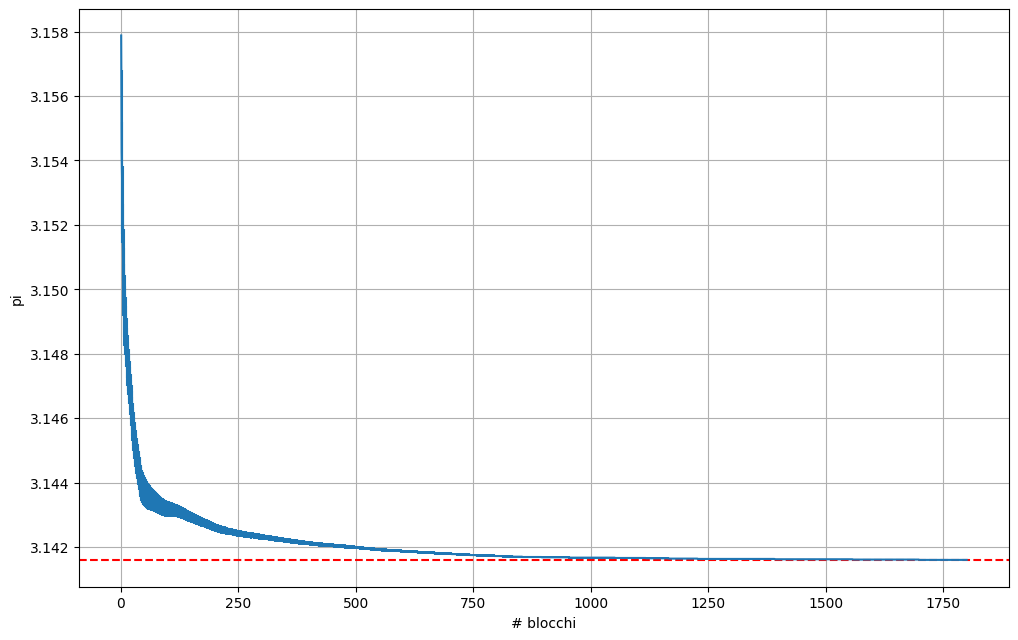

In [7]:
data=np.loadtxt("output_pi.dat")

plt.figure(figsize=(12, 7.5))
plt.errorbar(data[:1800, 0], data[:1800, 2], yerr=data[:1800, 3])
plt.axhline(y=np.pi, color='r', linestyle='--') 
plt.xlabel("# blocchi")
plt.ylabel('pi')
plt.grid(True)
plt.show()